In [ ]:
# We have digits inside a photograph(have 28*28 = 784 picsels).We will extract picsel value of photo and will send it into input layer having (28*28=784 inputs), one input for each picsel. After that, output will be sent to hidden layers.

In [ ]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [ ]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [ ]:
X_train.shape # This shows that X_train has data of 60000 images. And each image is 28 by 28 numpy array

(60000, 28, 28)

In [ ]:
X_train[0].shape

(28, 28)

In [ ]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
y_train.shape

(60000,)

In [ ]:
X_test.shape

(10000, 28, 28)

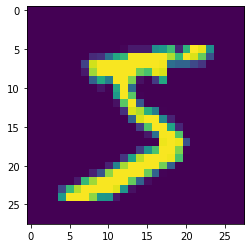

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])

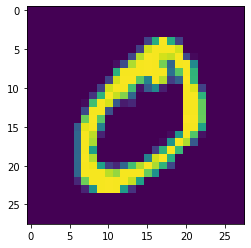

In [ ]:
plt.imshow(X_train[1])

In [ ]:
X_train[1].shape

(28, 28)

In [ ]:
X_train[5]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  13,  25, 100, 122,   7,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [ ]:
# Normalization - We need to bring array values between 0 and 1. Because during traing of neural network, if values are in similar range then convergence become faster in finding weights and biases

X_train_scaled = X_train/255 # Since any image has values between 0 and 255
X_test_scaled = X_test/255

In [ ]:
X_train_scaled[5]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [ ]:
model = Sequential()

model.add(Flatten(input_shape = (28,28))) # Since our data is in this format (28 * 28).All picsel values are in 2 D. So we will have to flatten the input layer.
model.add(Dense(128, activation = 'relu')) # First Hidden Layer
model.add(Dense(28, activation = 'relu'))
model.add(Dense(10, activation = 'softmax')) # If we have nodes greater than 1, we will use softmax

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 28)                3612      
                                                                 
 dense_4 (Dense)             (None, 10)                290       
                                                                 
Total params: 104,382
Trainable params: 104,382
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'Adam', metrics = ['accuracy']) # If we use loss = 'sparse_categorical_crossentropy' instead of 'categorical_crossentropy', then we will not have to do OneHotEncoding our labels (1,2,3,...,9)
history = model.fit(X_train_scaled, y_train, epochs = 25, validation_split = 0.2)

Epoch 1/25
1500/1500 [==============================] - 7s 4ms/step - loss: 0.2917 - accuracy: 0.9148 - val_loss: 0.1523 - val_accuracy: 0.9551
Epoch 2/25
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1251 - accuracy: 0.9625 - val_loss: 0.1194 - val_accuracy: 0.9634
Epoch 3/25
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0858 - accuracy: 0.9742 - val_loss: 0.0996 - val_accuracy: 0.9713
Epoch 4/25
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0645 - accuracy: 0.9795 - val_loss: 0.1011 - val_accuracy: 0.9697
Epoch 5/25
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0490 - accuracy: 0.9846 - val_loss: 0.1024 - val_accuracy: 0.9709
Epoch 6/25
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0383 - accuracy: 0.9879 - val_loss: 0.0929 - val_accuracy: 0.9746
Epoch 7/25
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0316 - accuracy: 0.9899 - val_loss: 0.1071 - val_accuracy:

In [ ]:
model.layers[0].get_weights()

[]

In [ ]:
model.layers[1].get_weights()

[array([[-0.0380072 ,  0.07722866,  0.05237747, ...,  0.0657971 ,
          0.0601422 ,  0.05717399],
        [-0.02630775, -0.05480016,  0.01466946, ...,  0.03390986,
          0.00674552,  0.03039838],
        [ 0.00278731, -0.00485328,  0.07191076, ...,  0.05649229,
         -0.00662948,  0.03002176],
        ...,
        [ 0.03380236,  0.00706094,  0.01324047, ...,  0.07555441,
         -0.04612883,  0.07679113],
        [-0.05046012, -0.00457028, -0.00294099, ..., -0.01332621,
          0.06341758, -0.02680279],
        [ 0.03559094, -0.08032836, -0.01267372, ..., -0.05427851,
         -0.00669917,  0.0081792 ]], dtype=float32),
 array([ 0.2581    , -0.03738201, -0.11999121,  0.22542629,  0.30390114,
        -0.02271737, -0.13499378, -0.03417956,  0.0340593 , -0.02929108,
        -0.2660595 , -0.03750728,  0.00605276, -0.21034683, -0.0678241 ,
        -0.10017062, -0.0407028 ,  0.04242976,  0.00333943,  0.13410299,
        -0.11235343, -0.15121397,  0.00548311,  0.16432266,  0.123

In [ ]:
model.layers[2].get_weights()

[array([[-0.5322318 , -0.36648697, -0.09553091, ..., -0.5372835 ,
          0.25518385, -0.5634107 ],
        [ 0.09697021,  0.13949071,  0.2647395 , ..., -0.03401095,
         -0.11252085,  0.32716906],
        [ 0.06618461, -0.2490792 ,  0.16246723, ...,  0.05793743,
          0.26332173,  0.02023746],
        ...,
        [ 0.1151064 , -0.0051029 , -0.21601167, ...,  0.6395827 ,
         -0.5593326 , -0.0065673 ],
        [-0.04691838, -0.40252638,  0.20337325, ..., -0.41014403,
         -0.35822153, -0.2994334 ],
        [ 0.10576592, -0.10755254, -0.18045808, ...,  0.21051322,
         -0.12862757, -0.11698653]], dtype=float32),
 array([ 0.165626  , -0.07255752, -0.14089468,  0.31965455,  0.259782  ,
         0.14384155,  0.2558962 ,  0.20139934, -0.08877883, -0.11943161,
         0.15002222, -0.06459435, -0.02313343,  0.03486959, -0.07441495,
         0.3759758 ,  0.22172584, -0.05152642,  0.19578677,  0.19180481,
         0.03695887,  0.08580389, -0.14523049,  0.14265488,  0.068

In [ ]:
model.layers[3].get_weights()

[array([[-0.00540685, -0.8472686 ,  0.35039285,  0.42320427, -0.80621463,
         -0.4066212 , -0.44581744,  0.20392522,  0.33593687,  0.3217241 ],
        [-0.7273439 ,  0.55181557,  0.1614185 , -0.59545   , -0.20728502,
          0.2722921 ,  0.26555464,  0.29458794,  0.11814671,  0.30975184],
        [-0.05988001, -0.1096559 , -0.02026462, -0.28203118, -0.46385732,
         -0.86723137,  0.37350327,  0.44231606, -0.721952  ,  0.2830777 ],
        [-0.12676187, -0.20610516, -0.15893523, -0.4861783 ,  0.25088054,
         -0.4672026 ,  0.09926646, -0.7131846 , -0.11602031, -0.47737253],
        [ 0.44819134,  0.22142564, -0.73334885, -0.4890066 ,  0.5267535 ,
         -0.38063052,  0.25247693, -0.14807615,  0.11696545,  0.3921043 ],
        [-0.17680885, -0.32384428, -0.5136823 ,  0.19523144, -0.07949904,
         -0.5779918 ,  0.6154002 , -0.50469786,  0.13786897, -0.55140555],
        [-0.0569219 , -0.8907045 , -0.2429215 , -0.19277236,  0.15145743,
          0.33746275, -0.4438655

In [ ]:
y_prob = model.predict(X_test) 
y_pred = y_prob.argmax(axis=1) # we have to find maximum probabilty for each image

313/313 [==============================] - 1s 2ms/step


In [ ]:
y_pred

array([7, 2, 1, ..., 4, 5, 6])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9763

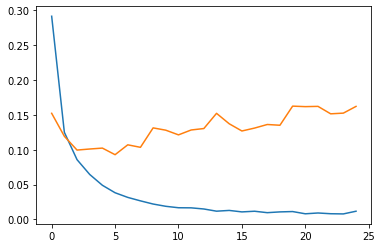

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

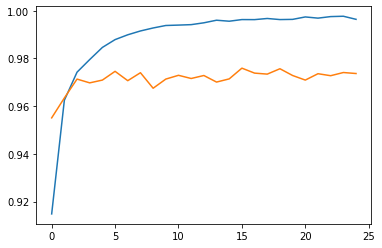

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

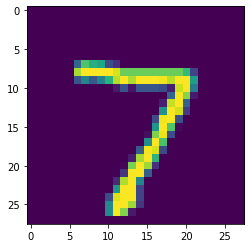

In [ ]:
# Checking Prediction

plt.imshow(X_test[0])

In [ ]:
model.predict(X_test[0].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 19ms/step


array([7])

In [ ]:
y_test[0]

7